In [1]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
h = Helper()

train_it, validation_it, test_it = h.construct_data_generator_w_validation(batch_size=10)

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


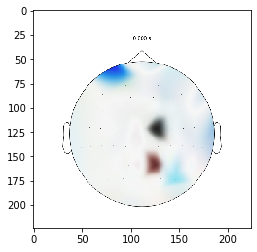

In [3]:
plt.imshow(train_it.next()[0][2])

data/train/05500.png


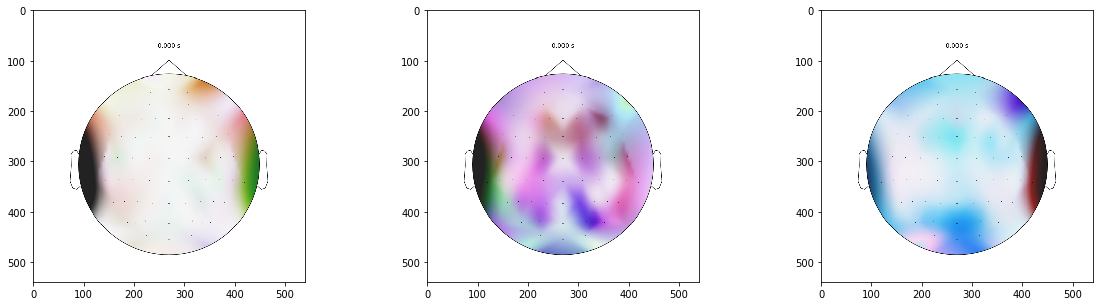

In [4]:
h.plot_examples()

In [5]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(80, (5,5), padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
    model.add(Conv2D(120, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides =(2,2)))
    model.add(Conv2D(160, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides =(2,2)))
    model.add(Conv2D(200, (5,5), padding = 'same', activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(60, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [6]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [7]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

ch = ModelCheckpoint('models/custom_checkpoints/cnn_topomap_classification_model_10.h5', monitor='val_accuracy', 
                     mode='max', save_best_only=True)

In [8]:
model = build_model(opt, loss, 'cnn_topomap_classification_model_10')

Model: "cnn_topomap_classification_model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 80)      6080      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 80)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 120)     240120    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 120)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 160)       480160    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 160)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (N

In [9]:
r = model.fit_generator(train_it, epochs=60, callbacks=[tb_log, ch], validation_data=validation_it)

Epoch 1/60
2205/2205 [==============================] - 300s 136ms/step - loss: 1.0978 - accuracy: 0.3499 - val_loss: 1.0747 - val_accuracy: 0.4171
Epoch 2/60
2205/2205 [==============================] - 298s 135ms/step - loss: 0.9168 - accuracy: 0.5376 - val_loss: 0.6985 - val_accuracy: 0.6854
Epoch 3/60
2205/2205 [==============================] - 300s 136ms/step - loss: 0.6863 - accuracy: 0.6898 - val_loss: 0.5312 - val_accuracy: 0.7721
Epoch 4/60
2205/2205 [==============================] - 299s 136ms/step - loss: 0.5545 - accuracy: 0.7616 - val_loss: 0.4736 - val_accuracy: 0.8048
Epoch 5/60
2205/2205 [==============================] - 296s 134ms/step - loss: 0.4610 - accuracy: 0.8061 - val_loss: 0.3951 - val_accuracy: 0.8454
Epoch 6/60
2205/2205 [==============================] - 296s 134ms/step - loss: 0.3948 - accuracy: 0.8385 - val_loss: 0.3555 - val_accuracy: 0.8641
Epoch 7/60
2205/2205 [==============================] - 297s 135ms/step - loss: 0.3361 - accuracy: 0.8660 - val_

2205/2205 [==============================] - 286s 130ms/step - loss: 0.0482 - accuracy: 0.9837 - val_loss: 0.3680 - val_accuracy: 0.9302
Epoch 57/60
2205/2205 [==============================] - 285s 129ms/step - loss: 0.0436 - accuracy: 0.9846 - val_loss: 0.3743 - val_accuracy: 0.9314
Epoch 58/60
2205/2205 [==============================] - 286s 130ms/step - loss: 0.0398 - accuracy: 0.9861 - val_loss: 0.3375 - val_accuracy: 0.9308
Epoch 59/60
2205/2205 [==============================] - 287s 130ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.3575 - val_accuracy: 0.9327
Epoch 60/60
2205/2205 [==============================] - 286s 130ms/step - loss: 0.0444 - accuracy: 0.9839 - val_loss: 0.3857 - val_accuracy: 0.9248


In [10]:
evaluate = model.evaluate_generator(test_it)

In [16]:
model_ch = h.load('models/custom_checkpoints/cnn_topomap_classification_model_10.h5')
e = model_ch.evaluate_generator(test_it)
e

[0.38082004019262383, 0.9311111]

In [12]:
y_prob = model.predict_generator(test_it)

In [13]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_10')

model saved, path: models/cnn_topomap_classification_model_10.h5


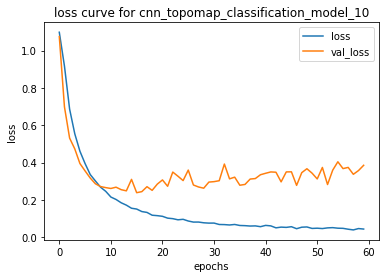

In [14]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_10')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_10.png')

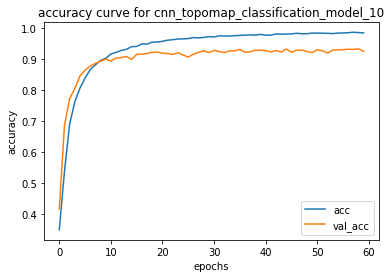

In [15]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_10')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_10.png')